In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Importing data
data = pd.read_csv('data/Heart Attack Data Set.csv')
index_dropped_rows=[]

In [3]:
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Análisis de Datos

## Sex

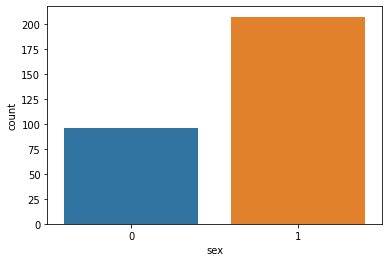

In [5]:
sns.countplot(data=data,x='sex')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

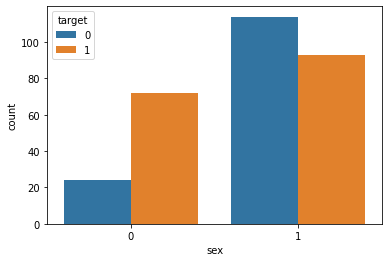

In [6]:
sns.countplot(data=data,x='sex',hue='target')

## Age

<AxesSubplot:xlabel='target', ylabel='age'>

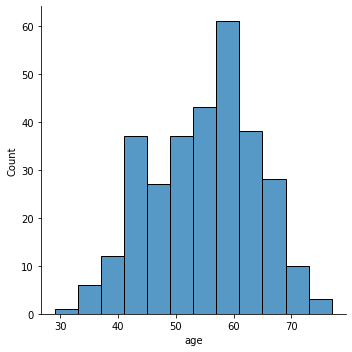

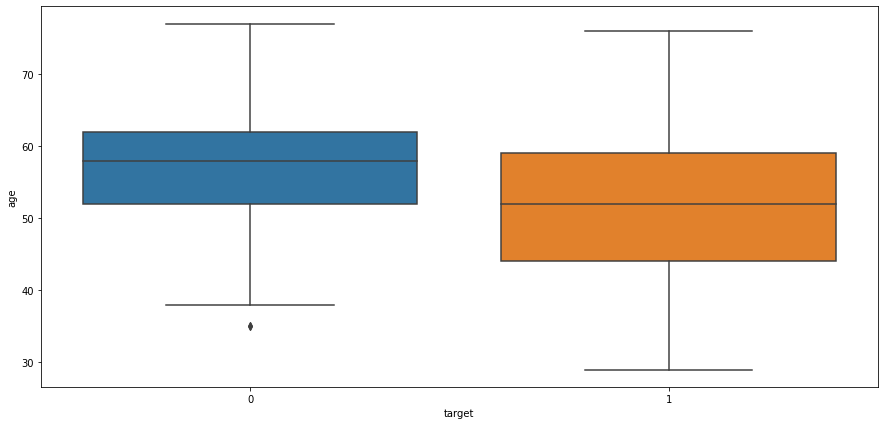

In [7]:
data['age'].nunique()
sns.displot(data['age'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='age')

## Chest Pain type 
1: typical angina (all criteria present)
2: atypical angina (two of three criteria satisfied)  
3: non-anginal pain (less than one criteria satisfied) 
4: asymptomatic (none of the criteria are satisfied)

<AxesSubplot:xlabel='cp', ylabel='count'>

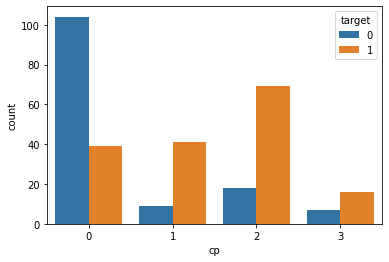

In [8]:
sns.countplot(data=data,x='cp',hue='target')

## Resting Blood pressure 
(in mmHg, upon admission to the hospital)

2


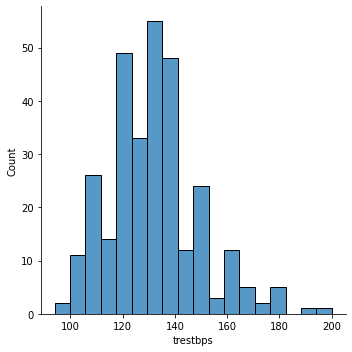

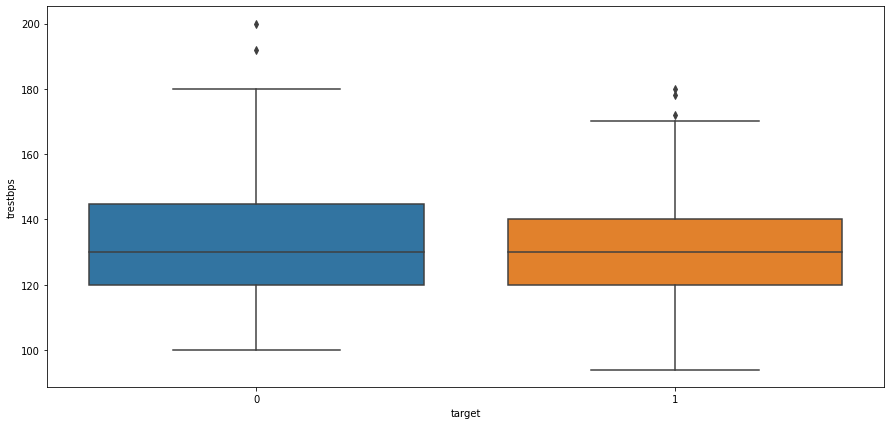

In [9]:
data['trestbps'].nunique()
sns.displot(data['trestbps'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='trestbps')


print(len(data[data['trestbps']>180]))

In [10]:
data[data['trestbps']>180]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [11]:
remove_data=data.index[data['trestbps']>180].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248]

## Cholesterol
Serum cholesterol in mg/dL

<AxesSubplot:xlabel='target', ylabel='chol'>

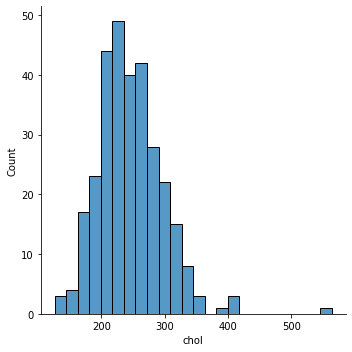

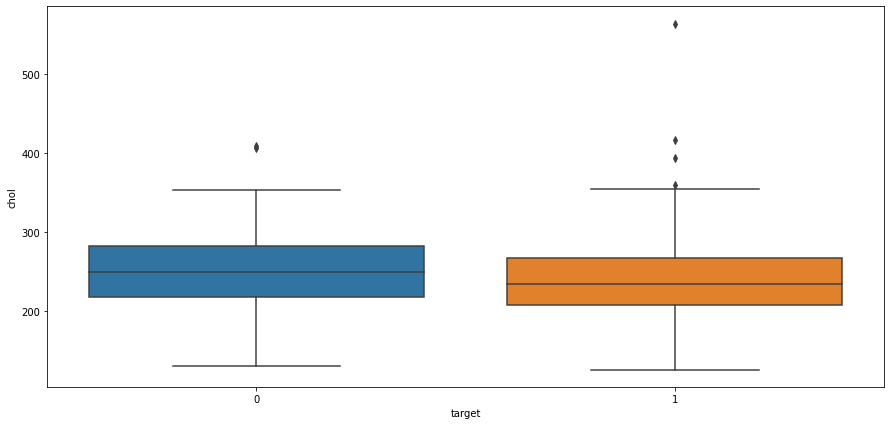

In [12]:
data['chol'].nunique()
sns.displot(data['chol'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='chol')

In [13]:
data[data['chol']>500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [14]:
remove_data=data.index[data['chol']>500].tolist()
for i in remove_data:
  index_dropped_rows.append(i)

## Fasting Blood Sugar 
Above 120 mg/dL (likely to be diabetic) 
1 = true; 0 = false

<AxesSubplot:xlabel='fbs', ylabel='count'>

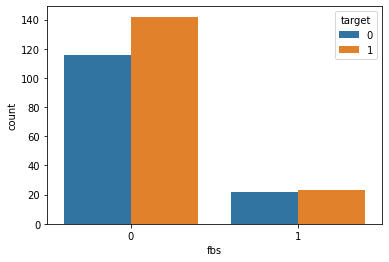

In [15]:
sns.countplot(data=data,x='fbs',hue='target')

## RestECG
Resting electrocardiogram results -- 
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

<AxesSubplot:xlabel='restecg', ylabel='count'>

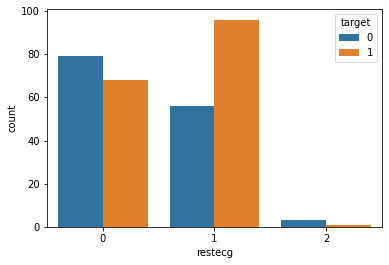

In [16]:
sns.countplot(data=data,x='restecg',hue='target')

## MaxHR 
Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise. 

<AxesSubplot:xlabel='target', ylabel='thalach'>

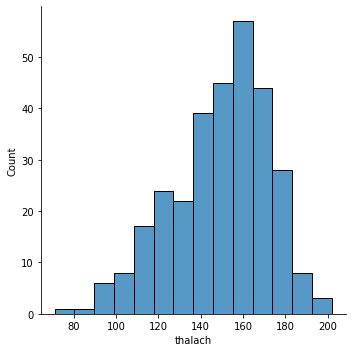

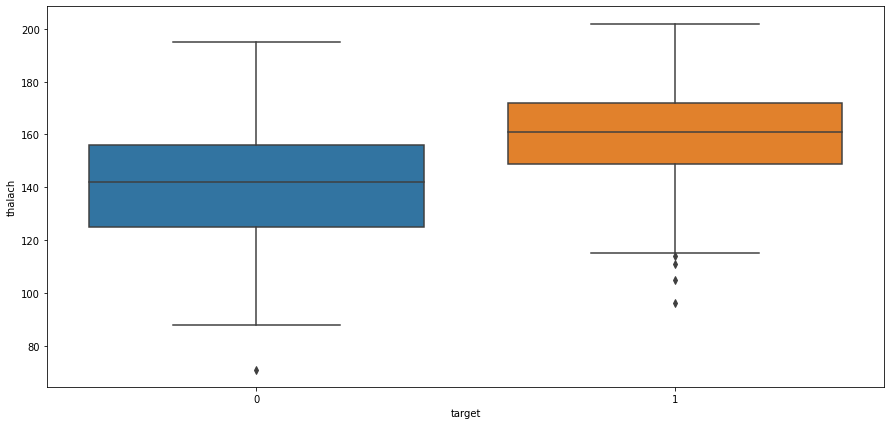

In [17]:
data['thalach'].nunique()
sns.displot(data['thalach'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='thalach')

In [18]:
data[data['thalach']<80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [19]:
remove_data=data.index[data['thalach']<80].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248, 85, 272]

## Exang: exercise induced angina 
(1 = yes; 0 = no)  

<AxesSubplot:xlabel='exang', ylabel='count'>

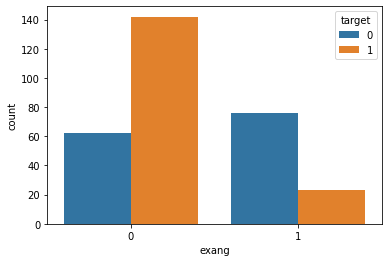

In [20]:
sns.countplot(data=data,x='exang',hue='target')

## Oldpeak
ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

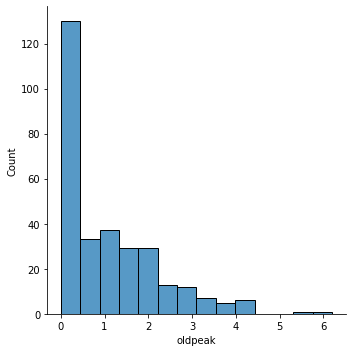

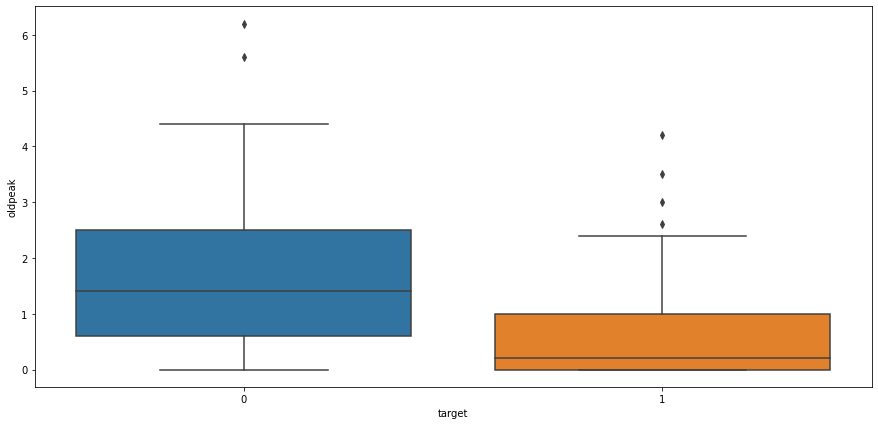

In [21]:
data['oldpeak'].nunique()
sns.displot(data['oldpeak'])
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='target',y='oldpeak')

In [22]:
data[data['oldpeak']>5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [23]:
remove_data=data.index[data['oldpeak']>5].tolist()
index_dropped_rows.extend(remove_data)
index_dropped_rows

[223, 248, 85, 272, 204, 221]

## Slope
The slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia 
Value 1: upsloping 
Value 2: flat 
Value 3: downsloping 

<AxesSubplot:xlabel='slope', ylabel='count'>

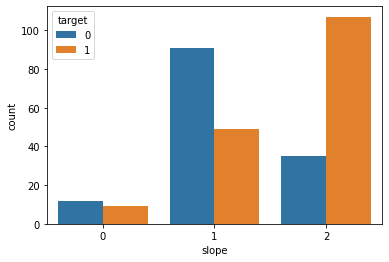

In [24]:
sns.countplot(data=data,x='slope',hue='target')

## Ca: number of major vessels (0-3) colored by fluoroscopy.
Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

<AxesSubplot:xlabel='ca', ylabel='count'>

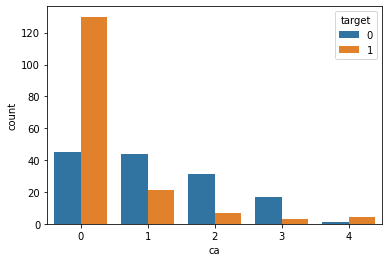

In [25]:
sns.countplot(data=data,x='ca',hue='target')

## AHD:
0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test) 

<AxesSubplot:xlabel='thal', ylabel='count'>

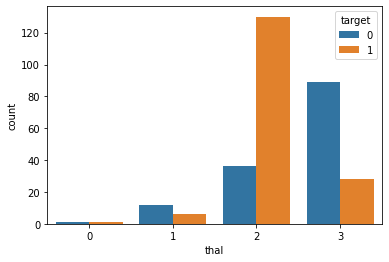

In [26]:
sns.countplot(data=data,x='thal',hue='target')

# Heatmap

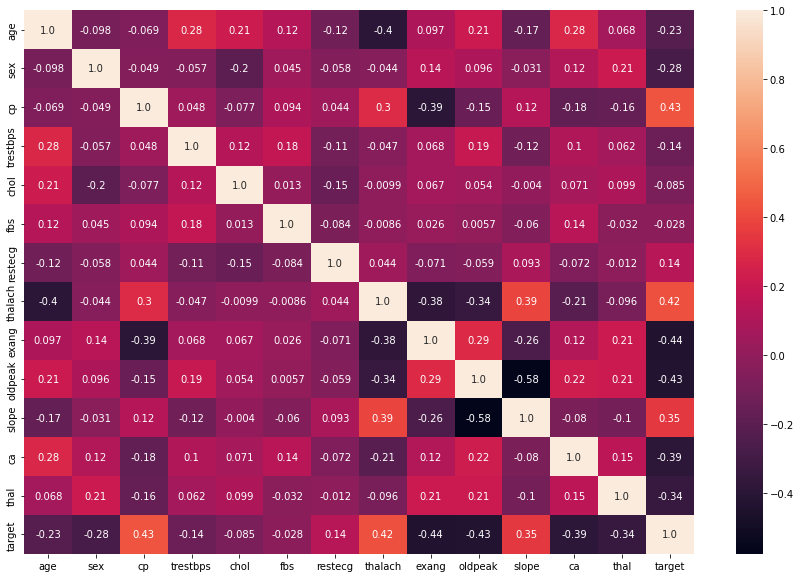

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')
plt.show()

In [28]:
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## One hot encoding for categorical Values

- **RestECG**: Resting electrocardiogram results 
    - 0: normal 
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 8.
- **Chest Pain type**
    - 1: typical angina (all criteria present) 
    - 2: atypical angina (two of three criteria satisfied)
    - 3: non-anginal pain (less than one criteria satisfied)
    - 4: asymptomatic (none of the criteria are satisfied)
- **Slope**: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia 
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- **AHD**:
    - 0 = normal
    - 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest)
    - 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
## RestECG

enc = OneHotEncoder(sparse=False)

encodedValues = enc.fit_transform(data[["restecg"]])

encodedValues = pd.DataFrame({
    "RestECG normal" : encodedValues[:,0],
    "RestECG abnormal" : encodedValues[:,1],
    "RestECG ventricular hypertrophy" : encodedValues[:,2],
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("restecg")

data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1,1.0,0.0,0.0
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1,0.0,1.0,0.0
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,1.0,0.0,0.0
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1,0.0,1.0,0.0
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1,0.0,1.0,0.0


In [31]:
encodedValues = enc.fit_transform(data[["cp"]])

encodedValues = pd.DataFrame({
    "Chest Pain typical angina" : encodedValues[:,0],
    "Chest Pain atypical angina" : encodedValues[:,1],
    "Chest Pain non-anginal pain" : encodedValues[:,2],
    "Chest Pain asymptomatic" : encodedValues[:,3],
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("cp")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic
0,63,1,145,233,1,150,0,2.3,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [32]:
encodedValues = enc.fit_transform(data[["slope"]])

encodedValues = pd.DataFrame({
    "Slope Upscaling" : encodedValues[:,0],
    "Slope Flat" : encodedValues[:,1],
    "Slope Downscaling" : encodedValues[:,2]
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("slope")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling
0,63,1,145,233,1,150,0,2.3,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,41,0,130,204,0,172,0,1.4,0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
encodedValues = enc.fit_transform(data[["thal"]])

encodedValues = pd.DataFrame({
    "AHD Normal" : encodedValues[:,0],
    "AHD Fixed Defect" : encodedValues[:,1],
    "AHD Reversible Defect" : encodedValues[:,2]
})

data = pd.concat([data,encodedValues], axis=1)

data.pop("thal")

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,37,1,130,250,0,187,0,3.5,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [34]:
#Removing outliers
data.drop(index=index_dropped_rows, inplace=True)

In [35]:
y = data.pop("target")
X = data

In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [37]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,RestECG normal,...,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,63,1,145,233,1,150,0,2.3,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,37,1,130,250,0,187,0,3.5,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
# Ver los valores únicos de las columnas para determinar si los datos son numéricos o categóricos 
X.nunique()

age                                 41
sex                                  2
trestbps                            47
chol                               148
fbs                                  2
thalach                             89
exang                                2
oldpeak                             38
ca                                   5
RestECG normal                       2
RestECG abnormal                     2
RestECG ventricular hypertrophy      2
Chest Pain typical angina            2
Chest Pain atypical angina           2
Chest Pain non-anginal pain          2
Chest Pain asymptomatic              2
Slope Upscaling                      2
Slope Flat                           2
Slope Downscaling                    2
AHD Normal                           2
AHD Fixed Defect                     2
AHD Reversible Defect                2
dtype: int64

## We need to divide the categoric from the continuous values to standardize the numeric values, but not the categorical ones.

In [39]:
categoric = X.drop(["age", "trestbps", "chol", "thalach", "oldpeak", "ca"], axis=1)
categoric.head()

,sex,fbs,exang,RestECG normal,RestECG abnormal,RestECG ventricular hypertrophy,Chest Pain typical angina,Chest Pain atypical angina,Chest Pain non-anginal pain,Chest Pain asymptomatic,Slope Upscaling,Slope Flat,Slope Downscaling,AHD Normal,AHD Fixed Defect,AHD Reversible Defect
0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
X = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]]
X.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0


In [41]:
featureTags = list(X.columns)
featureTags.extend(categoric.columns)
featureTags

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'ca',
 'sex',
 'fbs',
 'exang',
 'RestECG normal',
 'RestECG abnormal',
 'RestECG ventricular hypertrophy',
 'Chest Pain typical angina',
 'Chest Pain atypical angina',
 'Chest Pain non-anginal pain',
 'Chest Pain asymptomatic',
 'Slope Upscaling',
 'Slope Flat',
 'Slope Downscaling',
 'AHD Normal',
 'AHD Fixed Defect',
 'AHD Reversible Defect']

Now we standardize the continious values and append the categorical values to the new numpy array.

In [42]:
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
        -0.71160071],
       [-1.89817673, -0.06939471,  0.09610443,  1.65924163,  2.30735739,
        -0.71160071],
       [-1.45799833, -0.06939471, -0.85189465,  0.98792009,  0.37022076,
        -0.71160071],
       [ 0.19267068, -0.66679267, -0.19241703,  1.25644871, -0.18324685,
        -0.71160071],
       [ 0.30271528, -0.66679267,  2.2394067 ,  0.58512717, -0.36773606,
        -0.71160071]])

In [43]:
categorical_array = categoric.to_numpy()
categorical_array[5:]

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [44]:
new_X = np.concatenate((X,categorical_array), axis=1)
new_X[5:]

array([[ 0.30271528,  0.52800325, -1.09919876, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.19267068,  0.52800325,  1.00288616, ...,  0.        ,
         0.        ,  1.        ],
       [-1.12786452, -0.66679267,  0.36401721, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.51320589,  0.76696243, -1.07859008, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30271528, -0.06939471, -2.35632797, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30271528, -0.06939471, -0.19241703, ...,  0.        ,
         0.        ,  1.        ]])

In [45]:
X[0]

array([ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
       -0.71160071])

In [46]:
new_X[0]

array([ 0.96298288,  0.82670223, -0.25424306,  0.00331517,  1.20042217,
       -0.71160071,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ])

In [47]:
for feature, val in zip(featureTags, new_X[0]):
    print(f"Feature {feature.center(35,' ')}--> {val}")

Feature                 age                --> 0.9629828845018945
Feature               trestbps             --> 0.8267022296292442
Feature                 chol               --> -0.2542430559558268
Feature               thalach              --> 0.0033151680940168805
Feature               oldpeak              --> 1.2004221732162654
Feature                  ca                --> -0.7116007074895543
Feature                 sex                --> 1.0
Feature                 fbs                --> 1.0
Feature                exang               --> 0.0
Feature            RestECG normal          --> 1.0
Feature           RestECG abnormal         --> 0.0
Feature   RestECG ventricular hypertrophy  --> 0.0
Feature      Chest Pain typical angina     --> 0.0
Feature      Chest Pain atypical angina    --> 0.0
Feature     Chest Pain non-anginal pain    --> 0.0
Feature       Chest Pain asymptomatic      --> 1.0
Feature           Slope Upscaling          --> 1.0
Feature              Slope Flat       

### Dividing into the Training & Test Sets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

In [49]:
print(f"Total number of data is {len(y_train) + len(y_test)}")

print(f"Cantidad de positivos datos en y_train\t= {len(y_train[y_train == 1])}")
print(f"Cantidad de positivos datos en y_test \t= {len(y_test[y_test == 1])}")
print(f"Cantidad de negativos datos en y_train\t= {len(y_train[y_train == 0])}")
print(f"Cantidad de negativos datos en y_test \t= {len(y_test[y_test == 0])}")

Total number of data is 297
Cantidad de positivos datos en y_train	= 130
Cantidad de positivos datos en y_test 	= 34
Cantidad de negativos datos en y_train	= 107
Cantidad de negativos datos en y_test 	= 26


In [50]:
print(f"Ratio of negatives over positives is {(len(y_train[y_train == 1])/len(y_train))*100}%")
print(f"Ratio of negatives over positives is {(len(y_test[y_test == 1])/len(y_test))*100}%")

Ratio of negatives over positives is 54.85232067510548%
Ratio of negatives over positives is 56.666666666666664%


# Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
regModel = LogisticRegression(
    max_iter=10000,
    verbose=1
)

## Fitting the Logistic Regression Model to the training data

In [53]:
regModel.fit(X_train, y_train)
pred = regModel.predict(X_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64276D+02    |proj g|=  5.31173D+01

           * * *



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   23     37     42      1     0     0   5.669D-04   8.292D+01
  F =   82.917206890710602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [54]:
print(f"The score of certainty for the logistic regression model is {regModel.score(X_test, y_test)}")

The score of certainty for the logistic regression model is 0.85


# Results

### Plotting how accurately the model predicts the testing Data

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [56]:
cm = confusion_matrix(y_test, pred)

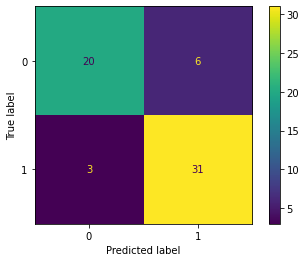

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Giving an interpretation of how much each feature contributes to predicting the model

In [58]:
modelCoeff = regModel.coef_[0]
for tag, val in zip(featureTags, modelCoeff):
    print(f"Feature importance {tag.center(35,' ')} -->\t{'{0:.4f}'.format(val)}")

Feature importance                 age                 -->	0.1218
Feature importance               trestbps              -->	-0.0509
Feature importance                 chol                -->	-0.0684
Feature importance               thalach               -->	0.3378
Feature importance               oldpeak               -->	-0.6019
Feature importance                  ca                 -->	-0.7504
Feature importance                 sex                 -->	-0.9073
Feature importance                 fbs                 -->	0.1922
Feature importance                exang                -->	-0.8276
Feature importance            RestECG normal           -->	-0.2727
Feature importance           RestECG abnormal          -->	0.3318
Feature importance   RestECG ventricular hypertrophy   -->	-0.0590
Feature importance      Chest Pain typical angina      -->	-0.9850
Feature importance      Chest Pain atypical angina     -->	-0.3581
Feature importance     Chest Pain non-anginal pain     -->	0.7665


In [59]:
absoluteImportance = list((abs(val) for val in modelCoeff))

print(f"The most  important feature according to the Regression Model is {featureTags[absoluteImportance.index(max(absoluteImportance))]}")
print(f"The least important feature according to the Regression Model is {featureTags[absoluteImportance.index(min(absoluteImportance))]}")

The most  important feature according to the Regression Model is AHD Reversible Defect
The least important feature according to the Regression Model is trestbps


This graph tries to plot how much value each feature contributes to the output of the model.

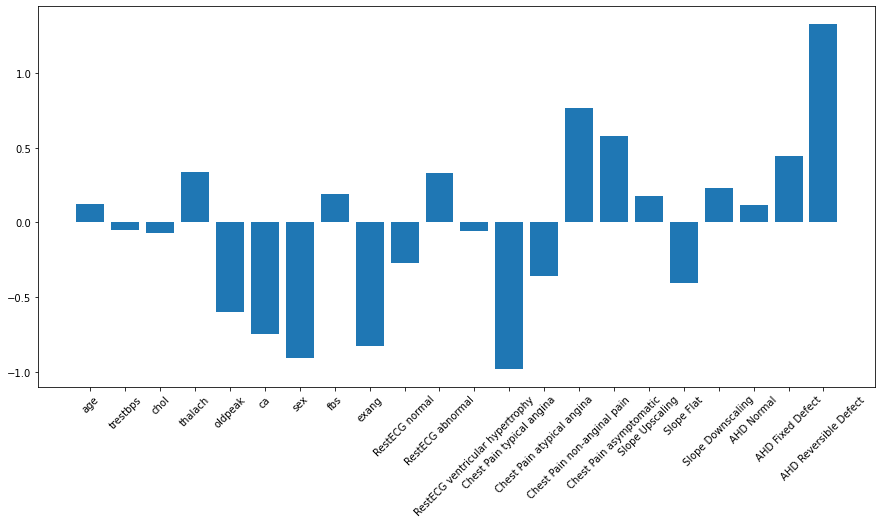

In [60]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.bar(featureTags, modelCoeff)
plt.show()

## Plotting the ROC Curve

In [61]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

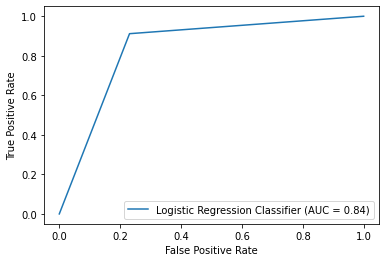

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regression Classifier')
display.plot()

plt.show()